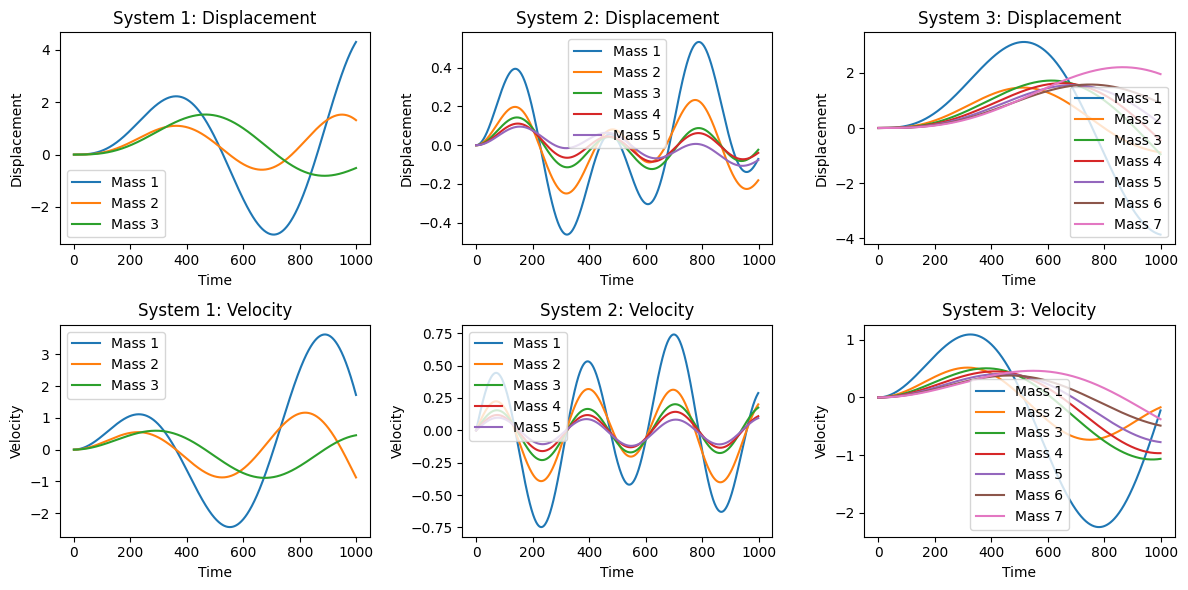

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_displacement_velocity(masses, k1, k2, k3, c, F):
    n = len(masses)
    dt = 0.01
    t = np.arange(0, 10, dt)
    
    # Initialize displacement and velocity arrays for each mass
    x = np.zeros((n, len(t)))
    v = np.zeros((n, len(t)))

    # Set initial conditions for all masses
    x[:, 0] = 0
    v[:, 0] = 0

    # Calculate displacement and velocity for each mass at each time step
    for i in range(1, len(t)):
        for j in range(n):
            if j == 0:
                # Apply equation of motion for the first mass
                x[j, i] = x[j, i-1] + dt * v[j, i-1]
                v[j, i] = v[j, i-1] + dt * (F[j](t[i]) - (k1 + k2 - k3) * x[j, i] + (k2 - k3) * x[j+1, i-1] + k3 * x[j+1, i-1] - c * v[j, i-1]) / masses[j]
            elif j == n-1:
                # Apply equation of motion for the last mass
                x[j, i] = x[j, i-1] + dt * v[j, i-1]
                v[j, i] = v[j, i-1] + dt * (F[j](t[i]) - (k1 + k2 - k3) * x[j, i] + (k2 - k3) * x[j-1, i-1] + k3 * x[j-1, i-1] - c * v[j, i-1]) / masses[j]
            else:
                # Apply equation of motion for masses in between
                x[j, i] = x[j, i-1] + dt * v[j, i-1]
                v[j, i] = v[j, i-1] + dt * (F[j](t[i]) - (k1 + k2 - k3) * x[j, i] + (k2 - k3) * (x[j-1, i-1] - x[j, i-1]) + k3 * (x[j+1, i-1] - x[j, i-1]) - c * v[j, i-1]) / masses[j]

    return x, v

# Define the external forces for each mass
def F1(t):
    return np.sin(t)

def F2(t):
    return np.cos(2 * t)

def F3(t):
    return np.sin(0.5 * t)

# Define the masses, spring constants, and damping coefficient for each system
masses1 = [1, 2, 3]
masses2 = [1, 2, 3, 4, 5]
masses3 = [1, 2, 3, 4, 5, 6, 7]

k1 = 1.0
k2 = 0.5
k3 = 0.75
c = 0.1  # Damping coefficient

# Calculate displacement and velocity for each system
x1, v1 = calculate_displacement_velocity(masses1, k1, k2, k3, c, [F1, F1, F1])
x2, v2 = calculate_displacement_velocity(masses2, k1, k2, k3, c, [F2, F2, F2, F2, F2])
x3, v3 = calculate_displacement_velocity(masses3, k1, k2, k3, c, [F3, F3, F3, F3, F3, F3, F3])

# Plot the displacement for each system
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
for i in range(len(masses1)):
    plt.plot(x1[i], label='Mass {}'.format(i+1))
plt.title('System 1: Displacement')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()

plt.subplot(2, 3, 2)
for i in range(len(masses2)):
    plt.plot(x2[i], label='Mass {}'.format(i+1))
plt.title('System 2: Displacement')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()

plt.subplot(2, 3, 3)
for i in range(len(masses3)):
    plt.plot(x3[i], label='Mass {}'.format(i+1))
plt.title('System 3: Displacement')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()

# Plot the velocity for each system
plt.subplot(2, 3, 4)
for i in range(len(masses1)):
    plt.plot(v1[i], label='Mass {}'.format(i+1))
plt.title('System 1: Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.subplot(2, 3, 5)
for i in range(len(masses2)):
    plt.plot(v2[i], label='Mass {}'.format(i+1))
plt.title('System 2: Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.subplot(2, 3, 6)
for i in range(len(masses3)):
    plt.plot(v3[i], label='Mass {}'.format(i+1))
plt.title('System 3: Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()

plt.tight_layout()
plt.show()